In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
results_base = os.path.join(os.environ['HOME'], 'fits/uoineuro/cur')
monkeys = [os.path.join(results_base, file) for file in os.listdir(results_base)]
monkeys.sort()

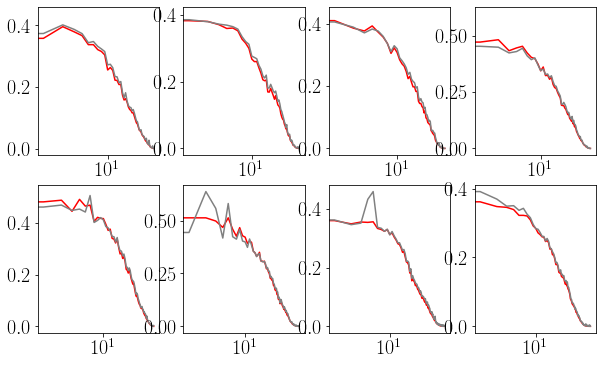

In [41]:
fig, axes = plt.subplots(2, 4, figsize=(10, 6))

for idx, ax in enumerate(axes.ravel()):
    results = h5py.File(monkeys[idx], 'r')
    uoi_reconstructions = results['uoi/reconstructions'][0]
    css_reconstructions = results['css/reconstructions'][0]

    ax.plot(uoi_reconstructions, color='red')
    ax.plot(css_reconstructions, color='gray')
    ax.set_xscale('log')

In [35]:
list(results['base_scores'])

[0.7993456162330638,
 0.8604273709749735,
 0.7314690781126297,
 0.8096896117892816]

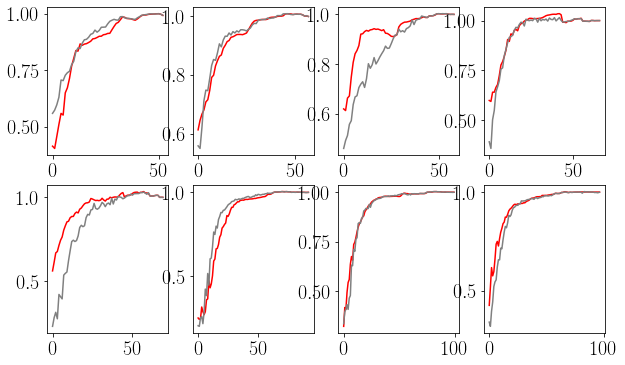

In [36]:
fig, axes = plt.subplots(2, 4, figsize=(10, 6))

for idx, ax in enumerate(axes.ravel()):
    results = h5py.File(monkeys[idx], 'r')
    base_scores = results['base_scores'][:]
    uoi_scores = results['uoi/scores/kalman_scores'][:]
    css_scores = results['css/scores/kalman_scores'][:]

    ax.plot(np.mean(uoi_scores, axis=0)[:, 0]/base_scores[0], color='red')
    ax.plot(np.mean(css_scores, axis=0)[:, 0]/base_scores[0], color='gray')

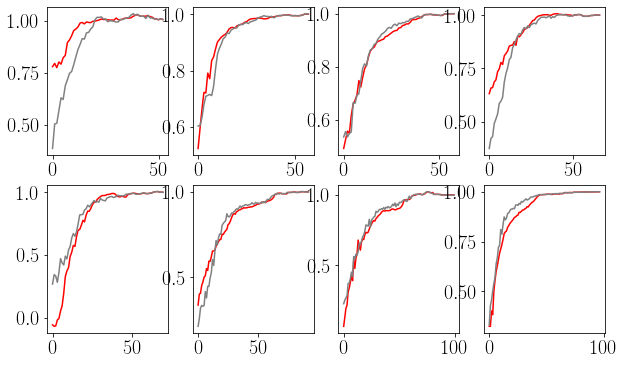

In [37]:
fig, axes = plt.subplots(2, 4, figsize=(10, 6))

for idx, ax in enumerate(axes.ravel()):
    results = h5py.File(monkeys[idx], 'r')
    base_scores = results['base_scores'][:]
    uoi_scores = results['uoi/scores/kalman_scores'][:]
    css_scores = results['css/scores/kalman_scores'][:]

    ax.plot(np.mean(uoi_scores, axis=0)[:, 1]/base_scores[1], color='red')
    ax.plot(np.mean(css_scores, axis=0)[:, 1]/base_scores[1], color='gray')

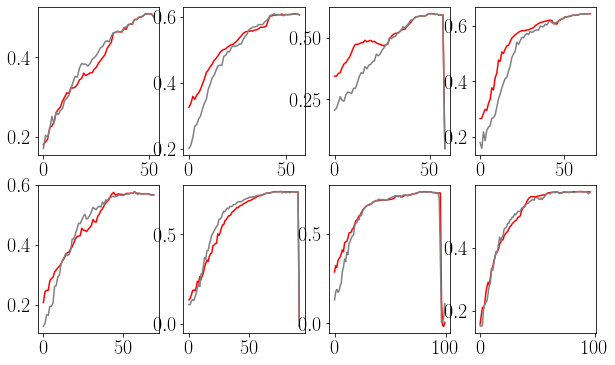

In [30]:
fig, axes = plt.subplots(2, 4, figsize=(10, 6))

for idx, ax in enumerate(axes.ravel()):
    results = h5py.File(monkeys[idx], 'r')
    uoi_scores = results['uoi/scores/linear_scores'][:]
    css_scores = results['css/scores/linear_scores'][:]

    ax.plot(np.mean(uoi_scores, axis=0)[:, 0], color='red')
    ax.plot(np.mean(css_scores, axis=0)[:, 0], color='gray')

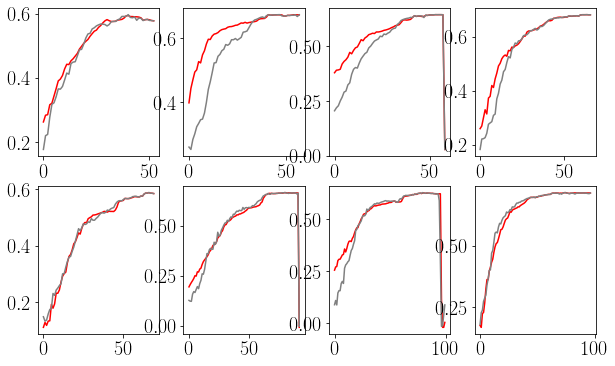

In [31]:
fig, axes = plt.subplots(2, 4, figsize=(10, 6))

for idx, ax in enumerate(axes.ravel()):
    results = h5py.File(monkeys[idx], 'r')
    uoi_scores = results['uoi/scores/linear_scores'][:]
    css_scores = results['css/scores/linear_scores'][:]

    ax.plot(np.mean(uoi_scores, axis=0)[:, 1], color='red')
    ax.plot(np.mean(css_scores, axis=0)[:, 1], color='gray')